## Exploratory Data Analysis

In [1]:
# Import Libraries
import os
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
import calendar

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Clenup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

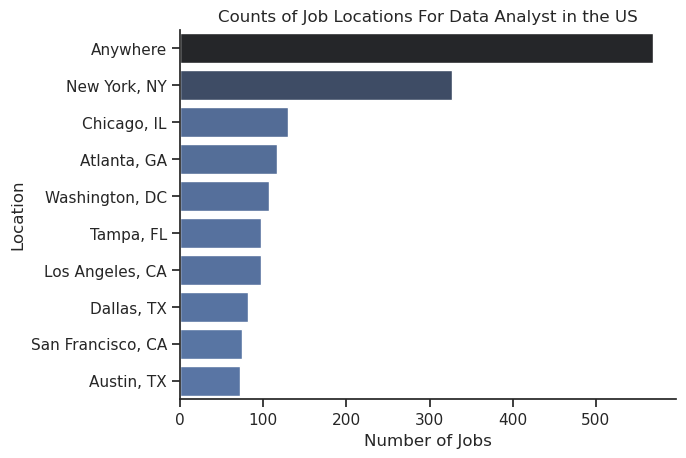

In [25]:

# Filter Data for Specific Job Titles
df_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Drop NaN values in 'salary_year_avg'
df_DA_US = df_US.dropna(subset=['salary_year_avg'])

df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()


sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False,)
sns.despine()
plt.title('Counts of Job Locations For Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.show()



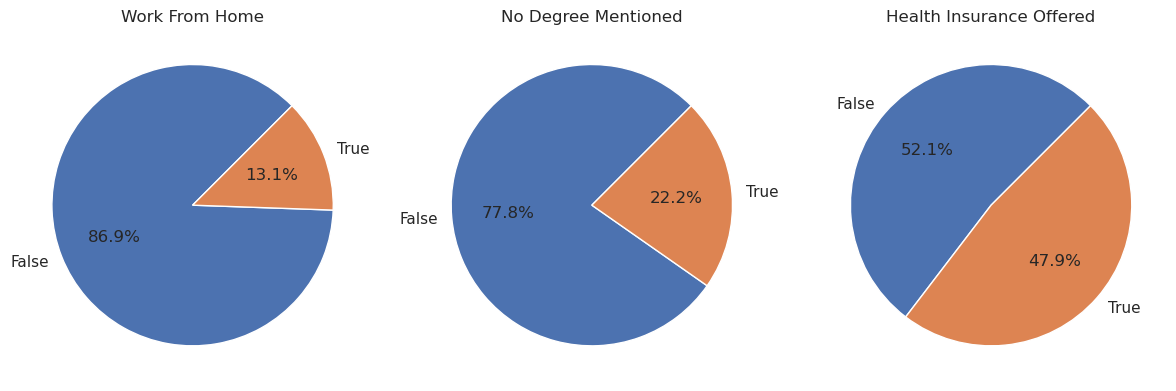

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

# Define column info and value label mappings
column_info = [
    ('job_work_from_home', 'Work From Home', {1: 'Yes', 0: 'No', True: 'Yes', False: 'No'}),
    ('job_no_degree_mention', 'No Degree Mentioned', {1: 'Yes', 0: 'No', True: 'Yes', False: 'No'}),
    ('job_health_insurance', 'Health Insurance Offered', {1: 'Yes', 0: 'No', True: 'Yes', False: 'No'})
]

for i, (column, title, value_map) in enumerate(column_info):
    if column in df_DA_US.columns:
        value_counts = df_DA_US[column].value_counts()
        # Map values to descriptive labels
        labels = [value_map.get(val, str(val)) for val in value_counts.index]
        ax[i].pie(value_counts, labels=['False', 'True'], autopct='%1.1f%%', startangle=45)
        ax[i].set_title(title)
    else:
        print(f"Warning: Column '{column}' not found in DataFrame.")

plt.tight_layout()
plt.show()

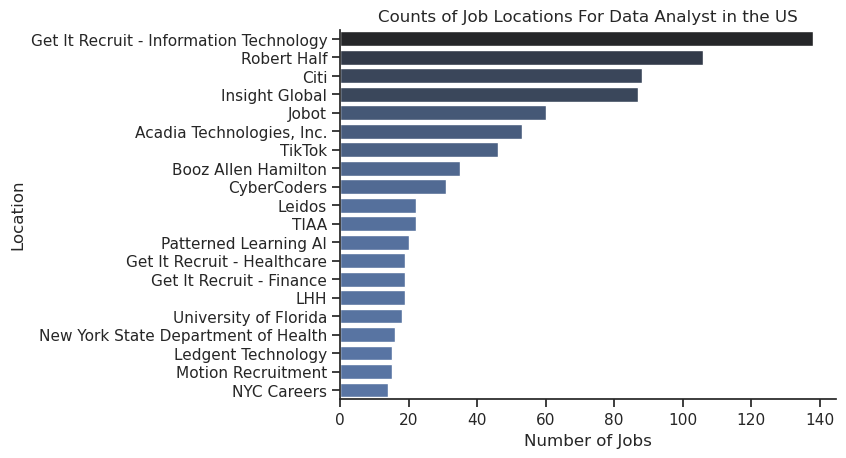

In [23]:
df_plot = df_DA_US['company_name'].value_counts().head(20).to_frame()


sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False,)
sns.despine()
plt.title('Counts of Job Locations For Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('Location')
plt.show()